# 6.S083 / 18.S190 Spring 2020: Problem set 3

Submission deadline: Tuesday April 21, 2020 at 11:59pm.


In this problem set, we will develop our first proper model that exhibits an **epidemic
outbreak**.

We will develop a **stochastic** (probabilistic) model of an infection propagating in a population  that is **well mixed**, i.e. in which everyone is in contact with everyone else.
An example of this would be a small school or university in which people are
constantly moving around and interacting with each other.

As usual, we will make modelling assumptions that allow us to reach the goal as fast and simply as possible.

The model is an **individual-based** or **agent-based** model -- in other words,
we explicitly keep track of each individual in the population and what their
infection status is. However, we will not keep track of their position in space;
we will just assume that there is some mechanism by which they interact with
other individuals which we do not include in the model (for now).

## Exercise 1: Modelling the spread of an infection or rumour

In this exercise we will model the spread of an infection or rumour in which
there is no recovery via a stochastic model, which we will implement in a Monte Carlo
simulation (i.e. a simulation that involves generating random numbers).

We will call the individuals **agents**.


1. Julia has a data type called an [**enumerated type**](https://en.wikipedia.org/wiki/Enumerated_type). Variables of this type can only take one of a pre-defined set of values; we will use this to model the possible internal state of an agent.

    The code to define an enum is as follows:

    ```julia
    @enum InfectionStatus S I R
    ```

    This defines a new type `InfectionStatus`, as well as names `S`, `I` and `R` that are the only possible values that a variable of this type can take.

    Define a variable `x` equal to `S`. What is its type?

2. Convert `x` to an integer using the `Int` function. What value does it have? What values do `I` and `R` have?

3. Take $N=100$. Make an array `agents` whose $i$th entry is the status of agent
number $i$. Make them all initially susceptible.

4. Now choose a single agent at random and make it infectious. (Hint: Use the
    `rand` function with a range to choose the index of the infectious agent.)

5. Write a function `step!` that takes a `Vector` `agents` and a probability `p_I`
as arguments.  This function may *modify* the content of `agents` to implement one step of the infection dynamics.

    1. Choose an agent $i$ at random.
    2. If $i$ is not infectious then nothing happens on this step so you can just `return`
 from the function.
     3. Choose another agent $j$ at random. Make sure that $i \neq j$. To do so, repeat this
    choice *until* $i \neq j$.
    4. If $j$ is not infected then $i$ infects $j$ with probability $p_I$.

6. Write a function `sweep!`. It runs `step!` $N$ times, where $N$ is the number of agents. Thus each agent acts, on average, once per sweep. One sweep is thus the unit
of time in our Monte Carlo simulation.

7. Write a function `infection_simulation`. It should take $N$ and $p_I$ as arguments,
as well as $T$, the total number of steps.

    1. First generate the `Vector` `agents` of length $N$ and a `Vector` `Is` to store
    the number of infectious individuals at each step.

    2. Run `sweep!` a number $T$ of times. Calculate the total number of infectious
    agents at the end of each step and store that number in `Is`.

    3. Return `Is` as the output of the function.

8. Run your simulation 50 times with $N=100$ and collect the data in a `Vector` of `Vector`s called `results`, using $p_I = 0.02$ and $T = 1000$.

    Plot each of the 50 graphs on the same plot using transparency 0.5.

9. Calculate the mean trajectory using the `mean` function applied to `results`. [This "just works" since `mean` is implmented in a generic way!] Add it to the plot using a heavier line.

10. Calculate the standard deviation $\sigma$ of $I$ at each step. [This should thus be a *vector.] Add this to the plot using **error bars**, using the option `yerr=σ` in the plot command; use transparency.

    This should confirm that the distribution of $I$ at each step is pretty wide!

9. You should see that the mean behaves in a similar way to what we saw in lectures using a *deterministic* model. So what is the deterministic model possibly describing, in terms of the stochastic model?

In [3]:
using CSV
using DataFrames
using Interact
using Plots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16687195924398642328\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1238074540377560630\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16687195924398642328\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [46]:
using StatsBase: mean
using Statistics: std

In [10]:
# Exercise 1, Part 1
@enum InfectionStatus S I R
x = S
typeof(x)

Enum InfectionStatus:
S = 0
I = 1
R = 2

In [16]:
# Exercise 1, Part 2
println("Int(x) = ", Int(x))
println("Int(I) = ", Int(I))
println("Int(R) = ", Int(R))

Int(x) = 0
Int(I) = 1
Int(R) = 2


In [26]:
#Exercise 1, Part 3
N = 100
agents = Array{InfectionStatus, 1}()
for i = 1:N
    push!(agents, I)
end
println(length(agents))

100


In [29]:
# Exercise 1, Part 4
infection_start = rand(1:N)
println("Making ", infection_start, " infectious!")
agents[infection_start] = I

Making 76 infectious!


I::InfectionStatus = 1

In [30]:
# Exercise 1, Part 5
function step!(v::Array{InfectionStatus,1}, p_I::Float64)
    # choose i and return if not infectious
    i = rand(1:length(v))
    if(v[i] != I)
        return
    end
    
    # choose j != i
    j = rand(1:length(v))
    while(i == j)
        j = rand(1:length(v))
    end
    
    # infect j w/p pI
    if v[j] == S && rand() < p_I
        v[j] = I
    end
end

step! (generic function with 1 method)

In [33]:
# Exercise 1, Part 6
function sweep!(v::Array{InfectionStatus, 1}, p_I::Float64)
    for i = 1:length(v)
        step!(v, p_I)
    end
end

sweep! (generic function with 1 method)

In [37]:
# Exercise 1, Part 7
function infection_simulation(N::Int64, p_I::Float64, T::Int64)
    # generate agents
    agents = Array{InfectionStatus, 1}()
    for i = 1:N
        push!(agents, S)
    end
    agents[rand(1:N)] = I
    
    # allocate Is
    Is = Array{Int64, 1}()
    
    # run time steps
    for i = 1:T
        # simulation
        sweep!(agents, p_I)
        # number of infected individuals
        curI = 0
        for j = 1:N
            if(agents[j] == I)
                curI += 1
            end
        end
        push!(Is, curI)
    end
    
    return Is
end

infection_simulation (generic function with 1 method)

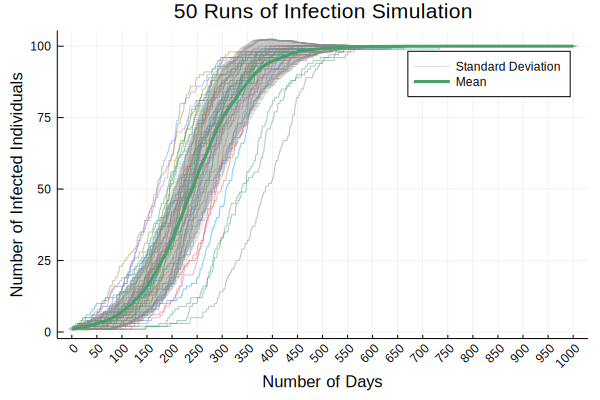

In [60]:
# Exercise 1, Parts 8 - 10
results = Vector{Vector{Int64}}()
T = 1000
p_I = 0.02
N = 100
for i = 1:50
    push!(results, infection_simulation(N, p_I, T))
end

p18 = plot(xticks=0:50:T, xrotation=45)
for i = 1:50
    plot!(p18, 1:T, results[i], seriesalpha = 0.5, label=false)
end

# mean/std
m = mean(results)
s = std(results)
# println(m)
# println(s)
# println(size(first(m)), ", ", size(s))
@assert size(m) == size(s)
plot!(p18, m, yerr = s, seriesalpha = 0.3, label = "Standard Deviation")
plot!(p18, m, linewidth = 3, label = "Mean")


xlabel!(p18, "Number of Days")
ylabel!(p18, "Number of Infected Individuals")
title!(p18, "50 Runs of Infection Simulation")
p18

### Exercise 1, Part 11
The deterministic model may represent a simulation where the random variables are replaced by their average values (giving a single, deterministic run, rather than a Monte-Carlo simulation).

## Exercise 2: Agent type

Suppose we want to track more information about each agent, e.g. how many other agents were infected by that agent. We could just create an additional array with that information in, but we will need to pass that around and will start to lose track of what belongs together.

Instead a good solution is to define a custom composite type.


1. Define a mutable type `Agent` as follows:

    ```jl
    mutable struct Agent
        status::InfectionStatus
        num_infected::Int
    end
    ```

2. Define a method of the constructor of `Agent` that takes no arguments and sets the status to `S` and
the number infected to 0.

3. Make an array `agents` of `Agent`s. Set the first one's infection status to `I`.

4. Rewrite your code from Exercise 1 to use the new `Agent` type. Now when your functions accept an `agents`
vector, they should assume that that represents a `Vector` of `Agent` objects.

    You can enforce this using a function signature like

    ```jl
    function f(agents::Vector{Agent})
    end
    ```

5. Update an agent's `num_infected` field whenever it infects another agent.

6. At the end of the simulation, extract the probability distribution of the "number of agents infected", using your code from Exercise 1 of Problem Set 2.

7. Plot the probability distribution. What kind of distribution does it seem to be? You will need to think about how to visualize this.

In [61]:
# Exercise 2, Parts 1-2
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end
Agent() = Agent(S, 0)

Agent

In [69]:
# Exercise 2, Part 3
agents = Array{Agent,1}()
for i = 1:N
    push!(agents, Agent())
end
agents[1].status = I

I::InfectionStatus = 1

In [72]:
# Exercise 2, Parts 4 - 6
function counts(data)
    d = Dict{Int, Int}()
    for v in data
        if(haskey(d, v))
            d[v] = d[v] + 1
        else
            d[v] = 1
        end
    end
    
    ks = collect(keys(d))
    vs = collect(values(d))
    p = sortperm(ks)
    return ks[p], vs[p]
end

function probability_distribution(data)
    k, v = counts(data)
    sumv = sum(v)
    return k, v/sumv
end

function step!(v::Array{Agent,1}, p_I::Float64)
    # choose i and return if not infectious
    i = rand(1:length(v))
    if(v[i].status != I)
        return
    end
    
    # choose j != i
    j = rand(1:length(v))
    while(i == j)
        j = rand(1:length(v))
    end
    
    # i injects j w.p. p_I
    if v[j].status == S && rand() < p_I
        v[j].status = I
        v[i].num_infected += 1
    end
end

function sweep!(v::Array{Agent, 1}, p_I::Float64)
    for i = 1:length(v)
        step!(v, p_I)
    end
end

function infection_simulation(N::Int64, p_I::Float64, T::Int64)
    # generate agents
    agents = Array{Agent, 1}()
    for i = 1:N
        push!(agents, Agent())
    end
    agents[rand(1:N)].status = I
    
    # allocate Is
    Is = Array{Int64, 1}()
    
    # run time steps
    for i = 1:T
        # simulation
        sweep!(agents, p_I)
        # number of infected individuals
        curI = 0
        for j = 1:N
            if(agents[j].status == I)
                curI += 1
            end
        end
        push!(Is, curI)
    end
    
    # vector of just num_infected
    agents_num_infected = Vector{Int}()
    for i = 1:N
        push!(agents_num_infected, agents[i].num_infected)
    end
    return probability_distribution(agents_num_infected)
end

infection_simulation (generic function with 1 method)

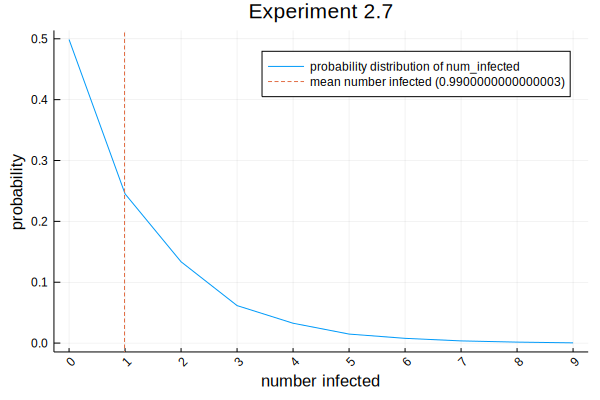

In [85]:
# Exercise 2, Part 7
res = Dict{Int, Float64}()
for i = 1:50
    xs, pxs = infection_simulation(N, p_I, T)
    @assert length(xs) == length(pxs)
    # accumulate - this is valid because all experiments use the same N
    for i = 1:length(xs)
        if(haskey(res, xs[i]))
            res[xs[i]] += pxs[i]
        else
            res[xs[i]] = pxs[i]
        end
    end
end
t1 = collect(keys(res))
t2 = collect(values(res))
p = sortperm(t1)
xs = t1[p]
pxs = t2[p] ./ 50

@assert(isapprox(sum(pxs), 1))

p27 = plot(xticks=xs, xrotation=45)
plot!(p27, xs, pxs, label="probability distribution of num_infected")
xlabel!(p27, "number infected")
ylabel!(p27, "probability")
title!(p27, "Experiment 2.7")
mean_num_infected = sum(xs .* pxs)
vline!(p27, [mean_num_infected], ls = :dash, label="mean number infected ($mean_num_infected)")
p27

The data appears to be exponentially distributed (see below)

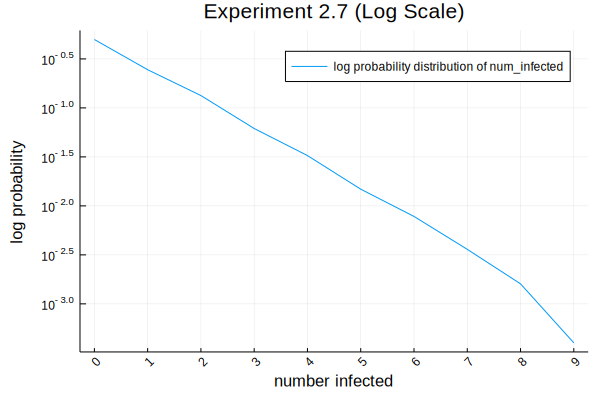

In [86]:
p271 = plot(xticks=xs, xrotation=45)
plot!(p271, xs, pxs, label="log probability distribution of num_infected", yscale=:log10)
xlabel!(p271, "number infected")
ylabel!(p271, "log probability")
title!(p271, "Experiment 2.7 (Log Scale)")
p271

## Exercise 3: Epidemic model

1. Add recovery to your model using an additional
parameter `p_R` in the `step!` and related functions.
Each agent should check if it is infected, and if so
it recovers with probability $p_R$ at each step.

    The function `simulation` should return vectors `Ss`, `Is` and `Rs` giving the time evolution of the numbers of $S$, $I$ and $R$, as well as the probability distribution of number of people infected.

2. Run the simulation with $N=1000$, $p_I = 0.1$ and $p_R = 0.01$ for time $T=1000$. Plot $S$, $I$ and $R$ as a function of time. You should see graphs that look familiar from the internet, with an epidemic outbreak, i.e. a significant fraction of infectious agents after a short time, which then recover.

3. Plot the distribution of `num_infected`. Does it have a recognisable shape?

4. Run the simulation 50 times and plot $I$ as a function of time for each, together with the mean over the 50 simulations (as you did in Exercise 2).

5. Describe 3 ways in which you could characterize the magnitude of the epidemic. Find these quantities for one of the runs of your simulation.

In [97]:
# Exercise 3, Part 1
function sweep!(v::Array{Agent, 1}, p_I::Float64, p_R::Float64)
    for i = 1:length(v)
        step!(v, p_I)
    end
    
    # each infected individual recovers w.p. p_R
    for i = 1:length(v)
        if(v[i].status == I && rand() < p_R)
            v[i].status = R
        end
    end
end

function infection_simulation(N::Int64, p_I::Float64, p_R::Float64, T::Int64)
    # generate agents
    agents = Array{Agent, 1}()
    for i = 1:N
        push!(agents, Agent())
    end
    agents[rand(1:N)].status = I
    
    # allocate Is
    Ss = Array{Int64, 1}()
    Is = Array{Int64, 1}()
    Rs = Array{Int64, 1}()
    
    # run time steps
    for i = 1:T
        # simulation
        sweep!(agents, p_I, p_R)
        # classify individuals
        curS = 0
        curI = 0
        curR = 0
        for j = 1:N
            if(agents[j].status == S)
                curS += 1
            elseif(agents[j].status == I)
                curI += 1
            else
                curR += 1
            end
        end
        push!(Ss, curS)
        push!(Is, curI)
        push!(Rs, curR)
    end
    
    # vector of just num_infected
    agents_num_infected = Vector{Int}()
    for i = 1:N
        push!(agents_num_infected, agents[i].num_infected)
    end
    
    return Ss, Is, Rs, probability_distribution(agents_num_infected)
end

infection_simulation (generic function with 2 methods)

In [101]:
# Exercise 3, Parts 2-3
N = 1000
p_I = 0.1
p_R = 0.01
T = 1000
Ss, Is, Rs, (xs, pxs) = infection_simulation(N, p_I, p_R, T)

# plot Ss, Is, Rs
p32 = plot(xticks=0:50:T, xrotation=45)
plot!(p32, 1:T, Ss, label="number susceptible")
plot!(p32, 1:T, Is, label="number infected")
plot!(p32, 1:T, Rs, label="number recovered")
xlabel!(p32, "number of days")
ylabel!(p32, "number of individuals")
title!(p32, "Experiment 3.2")

# plot num_infected
p33 = plot(xticks=xs, xrotation=45)
plot!(p33, xs, pxs, label="probability distribution of num_infected")
xlabel!(p33, "number infected")
ylabel!(p33, "probability")
title!(p33, "Experiment 3.3")
mean_num_infected = sum(xs .* pxs)
vline!(p33, [mean_num_infected], ls = :dash, label="mean number infected ($mean_num_infected)");

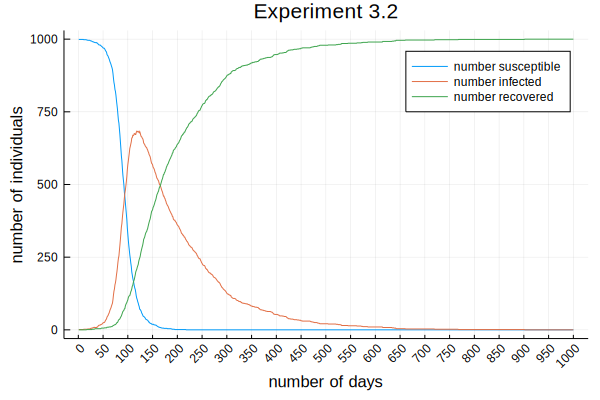

In [102]:
p32

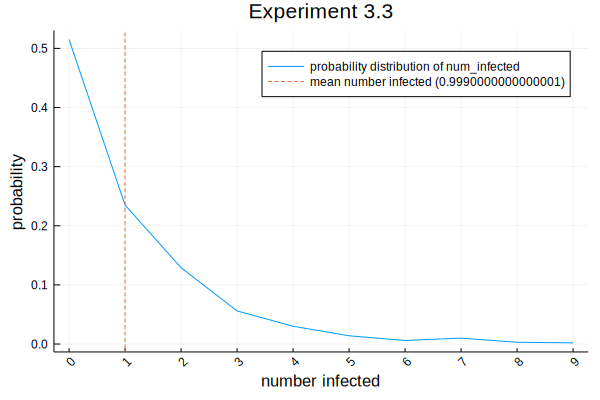

In [103]:
p33

The number infected graph still looks roughly the same as it did before.

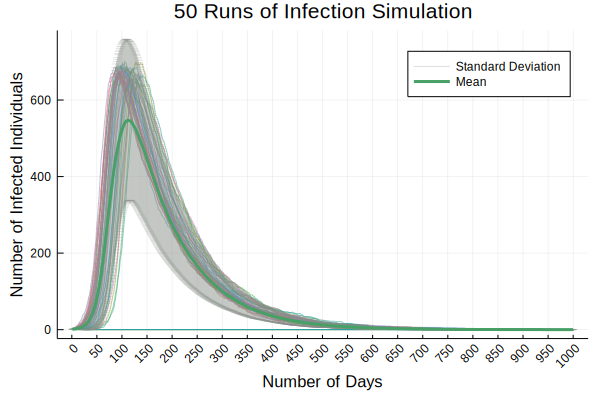

In [122]:
# Exercise 3, Part 4
results = Vector{Vector{Int64}}()
for i = 1:50
    Ss, Is, Rs, (xs, pxs) = infection_simulation(N, p_I, p_R, T)
    push!(results, Is)
end

p34 = plot(xticks=0:50:T, xrotation=45)
for i = 1:50
#     if(sum(results[i]) < 10)
#         println(i)
#         println(results[i])
#     end
    plot!(p34, 1:T, results[i], alpha = 0.5, label=false)
end

# mean/std
m = mean(results)
s = std(results)
# println(m)
# println(s)
# println(size(first(m)), ", ", size(s))
@assert size(m) == size(s)
plot!(p34, m, yerr = s, alpha = 0.3, label = "Standard Deviation")
plot!(p34, m, linewidth = 3, label = "Mean")


xlabel!(p34, "Number of Days")
ylabel!(p34, "Number of Infected Individuals")
title!(p34, "50 Runs of Infection Simulation")
p34

### Exercise 3, Part 5
We could characterize the magnitude of the epidemic by the average number of infected individuals per day, the amount of time that at least one individual was infected, and the maximum number of infected individuals.

In [123]:
amt_of_time_infected = 0
for i = 1:N
    if(results[2][i] == 0)
        amt_of_time_infected = i
        break
    end
end
avg_num_infected = mean(results[2][1:amt_of_time_infected])
max_num_infected = maximum(results[2])

println("Computation for a simulation")
println("Number of Days of Infection = ", amt_of_time_infected, " days")
println("Average Number Infected = ", avg_num_infected, " people")
println("Maximum # Infected = ", max_num_infected, " (out of $N people)")

Computation for a simulation
Number of Days of Infection = 756 days
Average Number Infected = 134.3531746031746 people
Maximum # Infected = 652 (out of 1000 people)
